**Stock Price Prediction**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

raw_link = 'https://raw.githubusercontent.com/PacktWorkshops/The-Deep-Learning-Workshop/master/Chapter05/Datasets/AAPL.csv'

inp0 = pd.read_csv(raw_link)
inp0.head()


,Date,Close,Open,High,Low,Volume
0,1/17/2020,138.31,136.54,138.330,136.16,5623336
1,1/16/2020,137.98,137.32,138.190,137.01,4320911
2,1/15/2020,136.62,136.00,138.055,135.71,4045952
3,1/14/2020,135.82,136.28,137.139,135.55,3683458
4,1/13/2020,136.60,135.48,136.640,135.07,3531572


In [80]:
inp0.tail()
inp0.isnull().sum()

Date       0
Close      0
 Open      0
 High      0
 Low       0
 Volume    0
dtype: int64

**Visualising time-series data**

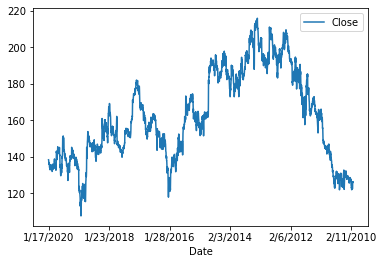

In [3]:
inp0.plot('Date', 'Close')
plt.show()

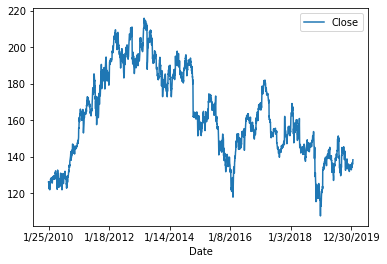

In [4]:
#Observe that the latest value are plotted first
#Let's fix this by sorting the Dataframe by index in descending order

inp0 = inp0.sort_index(ascending=False)
inp0.plot('Date', 'Close')
plt.show()


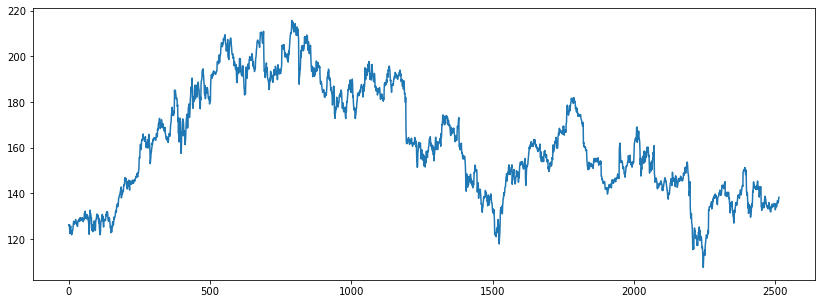

In [5]:
#Extract value for Close from the Dataframe as a numpy array, reshaped to specify one column \
#using array.reshape(-1,1)

ts_data = inp0.Close.values.reshape(-1,1)

plt.figure(figsize=[14,5])
plt.plot(ts_data)
plt.show()

In [78]:
#get train, test split
train_recs = int(len(ts_data)*0.75)

train_data = ts_data[:train_recs]
test_data = ts_data[train_recs:]
len(train_data), len(test_data)

(1885, 629)

In [79]:
#next we scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data)
test_scaled = scaler.transform(test_data)


In [81]:
#define a lookback period

def get_lookback(inp, look_back):
    y = pd.DataFrame(inp)
    dataX = [y.shift(i)for i in range(1, look_back+1)]
    dataX = pd.concat(dataX, axis=1)
    dataX.fillna(0, inplace = True)
    return dataX.values, y.values

In [88]:
look_back = 10
trainX, trainY = get_lookback(train_scaled, look_back = look_back)
testX, testY = get_lookback(test_scaled, look_back = look_back)

trainX[:10]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.08443083, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.08065339, 0.08443083, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.08657478, 0.08065339, 0.08443083, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.06023481, 0.08657478, 0.08065339, 0.08443083, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.04635018, 0.06023481, 0.08657478, 0.08065339, 0.08443083,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.06962736, 0.04635018, 0.06023481, 0.08657478, 0.08065339,
        0.08443083, 0.        , 0.        , 0.        , 0.        ],
       [0.07840735, 0.06962736, 0.0463501